In [113]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Wir laden nochmals den MNIST-Datensatz und betrachten genau die Array-Shapes, welche wir auch beim geladenen NOTMNIST-Datensatz erhalten müssen:

In [230]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.dtype,y_train.dtype,(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(dtype('float32'),
 dtype('uint8'),
 ((60000, 1, 28, 28), (60000,)),
 ((10000, 1, 28, 28), (10000,)))

In [226]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

import pandas as pd
#ev. ist es nötig, die folgenden Befehle auszuführen:

    !unzip train.csv.zip
    !unzip test.csv.zip
    !chmod 644 test.csv
    !chmod 644 train.csv
    !chmod 644 test.csv

In [231]:
from sklearn.preprocessing import OneHotEncoder
df_train= pd.read_csv('train.csv',header=None,index_col=0)
X_train = df_train.values[:,1:]
X_train = X_train.reshape(-1,28,28,1)
X_train = X_train.astype('float32')
X_train /= 255
X_train.dtype,X_train.shape,np.min(X_train),np.max(X_train)

(dtype('float32'), (9360, 28, 28, 1), 0.0, 1.0)

In [233]:
df_test= pd.read_csv('test.csv',header=None,index_col=0)
X_test = df_test.values
X_test = X_test.reshape(-1,28,28,1)
X_test = X_test.astype('float32')
X_test /= 255
X_test.dtype,X_test.shape,np.min(X_test),np.max(X_test)

(dtype('float32'), (9364, 28, 28, 1), 0.0, 1.0)

In [311]:
label_to_int_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9}

In [310]:
y_train = df_train[1]
y_train_int = y_train.map(label_to_int_dict)
#Äquivalent, aber weniger transparent:
#pd.Series(y_NotMNIST.unique()).map(ord)-65

y_train_int = y_train_int.values.reshape(-1,1).astype('uint8')
y_train_int.dtype,y_train_int.shape,np.unique(y_train_int)

(dtype('uint8'), (9360, 1), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [304]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_train_ohe = ohe.fit_transform(y_train_int)

#nicht sehr speichereffizient, aber wir haben ja auch nur wenig Daten...
y_train = y_train_ohe.todense() 
print(y_ohe.shape)
y_train[0],y_train_int[0],y_train_ohe[0,:]

(9360, 10)


(matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0], dtype=uint8),
 <1x10 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>)

In [309]:
ohe.transform(1).todense()

ValueError: could not convert string to float: 'B'

In [284]:
#!chmod 644 test.csv
df_NotMNIST_test = pd.read_csv('test.csv',header=None,index_col=0)

In [285]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0],  28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape

(9360, 28, 28, 1)

In [286]:
# 7. Define model architecture
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu',name='myconv1'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu',name='mydense1'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/toedtli/.virtualenvs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="myconv1")`
  after removing the cwd from sys.path.


In [287]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [288]:
# 9. Fit model on training data
hist = model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

/home/toedtli/.virtualenvs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
9360/9360 [==============================] - 20s 2ms/step - loss: 1.9573 - acc: 0.3026
Epoch 2/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.9023 - acc: 0.7373
Epoch 3/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.7405 - acc: 0.7919
Epoch 4/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.6784 - acc: 0.8119
Epoch 5/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.6453 - acc: 0.8152
Epoch 6/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.6245 - acc: 0.8233
Epoch 7/10
9360/9360 [==============================] - 19s 2ms/step - loss: 0.6154 - acc: 0.8210
Epoch 8/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.6031 - acc: 0.8266
Epoch 9/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.5855 - acc: 0.8276
Epoch 10/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.5746 - acc: 0.8311


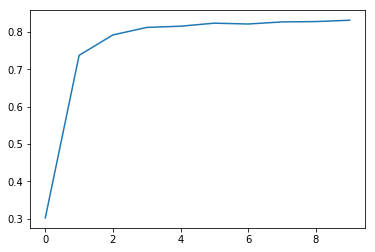

In [289]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['acc'])

In [293]:
# 10. Evaluate model on test data
score = model.evaluate(X_train, y_train, verbose=0)
np.around(score,2)

array([0.41, 0.88])

In [105]:
# 7. Define model architecture
model2 = Sequential()
model2.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model2.add(Convolution2D(32, (3, 3), activation='relu',name='myconv2'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model2.add(Convolution2D(32, (3, 3), activation='relu',name='myconv3'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(128, activation='relu',name='mydense1'))
model2.add(Dense(128, activation='relu',name='mydense2'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# 8. Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [107]:
# 9. Fit model on training data
hist2 = model2.fit(X_NotMNIST, y_NotMNIST_ohe, 
          batch_size=32, epochs=10, validation_split=0.1,verbose=1)

Epoch 1/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.9952 - acc: 0.6928
Epoch 2/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.5514 - acc: 0.8424
Epoch 3/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.4327 - acc: 0.8731
Epoch 4/10
9360/9360 [==============================] - 24s 3ms/step - loss: 0.3812 - acc: 0.8854
Epoch 5/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.3447 - acc: 0.8926
Epoch 6/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.3152 - acc: 0.9071
Epoch 7/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.3001 - acc: 0.9111
Epoch 8/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.2907 - acc: 0.9135
Epoch 9/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.2589 - acc: 0.9198
Epoch 10/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.2548 - acc: 0.9246


In [294]:
plt.plot(hist2.history['acc'])

NameError: name 'hist2' is not defined

In [282]:
# 10. Evaluate model on test data
model2.evaluate?
score = model2.evaluate(X_test, Y_test, verbose=0)
score

ValueError: Input arrays should have the same number of samples as target arrays. Found 9364 input samples and 10000 target samples.

In [125]:
from keras.layers import Conv2D,BatchNormalization,ZeroPadding2D
from keras.regularizers import l2
l2_reg = 0.05
n_classes = Y_train.shape[1]

alexnet = Sequential()
alexnet.add(Conv2D(96, (11, 11), input_shape=(28,28,1),
    padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(3072))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [126]:
# 8. Compile model
alexnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [127]:
# 9. Fit model on training data
hist3 = alexnet.fit(X_NotMNIST, y_NotMNIST_ohe, 
          batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Train on 8424 samples, validate on 936 samples
Epoch 1/10
8424/8424 [==============================] - 453s 54ms/step - loss: 0.7493 - acc: 0.8745 - val_loss: 3.2689 - val_acc: 0.0000e+00
Epoch 2/10
8424/8424 [==============================] - 445s 53ms/step - loss: 0.4959 - acc: 0.9182 - val_loss: 3.4762 - val_acc: 0.0000e+00
Epoch 3/10
8424/8424 [==============================] - 445s 53ms/step - loss: 0.4164 - acc: 0.9257 - val_loss: 4.2952 - val_acc: 0.0000e+00
Epoch 4/10
8424/8424 [==============================] - 446s 53ms/step - loss: 0.3650 - acc: 0.9283 - val_loss: 4.9391 - val_acc: 0.0000e+00
Epoch 5/10
8424/8424 [==============================] - 435s 52ms/step - loss: 0.3095 - acc: 0.9408 - val_loss: 4.8965 - val_acc: 0.0000e+00
Epoch 6/10
8424/8424 [==============================] - 432s 51ms/step - loss: 0.2741 - acc: 0.9486 - val_loss: 5.8508 - val_acc: 0.0000e+00
Epoch 7/10
8424/8424 [==============================] - 432s 51ms/step - loss: 0.2372 - acc: 0.9569 - val_l

Versuchen wir nun, die Ausgabe des neuronalen Netzes zu verstehen

In [296]:
y_hat_train = alexnet.predict(X_train)
y_hat_test = alexnet.predict(X_test)

In [297]:
y_hat_train.shape

(9360, 10)

In [298]:
np.any(np.isnan(y_hat_train))

False

In [312]:
int_to_label_dict = dict(zip(label_to_int_dict.values(),label_to_int_dict.keys()))
int_to_label_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J'}

/home/toedtli/.virtualenvs/v_py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


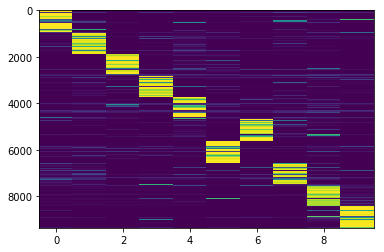

In [313]:
plt.imshow(y_hat_train)
plt.axes().set_aspect('auto')

In [327]:
y_hat_train_int = pd.Series(np.argmax(y_hat_train,axis=1),name='target')
y_hat_test_int = pd.Series(np.argmax(y_hat_test,axis=1),name='target')

y_hat_train_int.unique()

array([0, 7, 6, 8, 9, 1, 3, 2, 4, 5])

In [315]:
y_hat_train_int = pd.Series(np.argmax(y_hat_train,axis=1),name='target')
y_hat_train2 = y_hat_train_int.map(int_to_label_dict)
y_hat_train2.unique()

array(['A', 'H', 'G', 'I', 'J', 'B', 'D', 'C', 'E', 'F'], dtype=object)

In [324]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat_train_int,y_train.map(label_to_int_dict))

0.6985042735042735

In [331]:
y_hat_test = y_hat_test_int.map(int_to_label_dict)

In [332]:
y_hat_test = pd.Series(y_hat_test,name='target')
y_hat_test.index.name = 'Id'

In [334]:
y_hat_test.to_csv('prediction_toedtli.csv')